<div class="mark">
LOW BIRTH WEIGHT ANALYSIS

Author details Author : Sree Lakshmi Sravya Duddupudi

Project Details : Machine Learning- Regression Analysis

Date :22-November-2021</div><i class="fa fa-lightbulb-o "></i>

# . Table Of Contents
    
    2. Data Processing And Exploration.
        2.1 Importing the necessary packages. 
        2.2 Inputing the columns.
        2.3 Checking for missing values and duplicates. 
        2.4 Imputing the missing values with mean/median/mode. 
        2.5 Plotting the y-variable distribution. 
        2.6 Running descriptive statistics for the data. 
    3. Correlation Analysis between Variables
        3.1 Plotting the correlation graphs.
        3.2 Correlation with respect to 'bwght'.
    4. Feature engineering the Variables.
        4.1 Engineering the most co-related x-variables.  
    5.  Splitting the data in test and train data
        5.1 Separating the features and target variable .
        5.2 Splitting the data into test and train data sets.
    6. Creating models
        6.1 Ordinary Least squared regression
        6.2 Lasso Regression
        6.3 ADR Regression
        6.4 KNN
    7. Comparison of models
    8. Conclusion

# . Data Processing And Exploration.
    2.1 Importing the necessary packages.

In [1]:
#importing the necessary libraries

import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
import numpy as np



#Loading the data file
file = "birthweight_low.xlsx"

#reading the file into python
bw = pd.read_excel( io = file,
                    sheet_name = 0,
                    header = 0)
print("The Initial DataFrame has",bw.shape[0],"rows and",bw.shape[1],"columns.")
print("Income is the Target Variable.")
print("Hence the data has ",bw.shape[0],"rows and",bw.shape[1],"initial features.")



The Initial DataFrame has 196 rows and 18 columns.
Income is the Target Variable.
Hence the data has  196 rows and 18 initial features.



    2.2  Insert Columns



In [2]:
#Add columns to the dataset
bw.columns = ['MoAge','MoEduc','MonPre','Nopvis','FaAge','FaEduc','omaps','fmaps','cigs','drink','male','Mowhte','Moblck','Mooth','Fawhte','Fablck','Faoth','bwght']


In [3]:
#getting the first 10 rows of the data
bw.head(10)

,MoAge,MoEduc,MonPre,Nopvis,FaAge,FaEduc,omaps,fmaps,cigs,drink,male,Mowhte,Moblck,Mooth,Fawhte,Fablck,Faoth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [4]:
#getting the last 10 rows of data
bw.tail(10)

,MoAge,MoEduc,MonPre,Nopvis,FaAge,FaEduc,omaps,fmaps,cigs,drink,male,Mowhte,Moblck,Mooth,Fawhte,Fablck,Faoth,bwght
186,42,16.0,2,12.0,26,16.0,9,9,5,1,1,0,0,1,1,0,0,4224
187,35,12.0,2,12.0,35,12.0,8,9,6,2,1,0,0,1,0,0,1,4259
188,33,16.0,2,12.0,35,16.0,8,9,1,3,1,0,0,1,0,0,1,4315
189,49,11.0,2,12.0,39,16.0,9,9,0,3,0,0,1,0,0,1,0,4470
190,43,15.0,6,11.0,36,12.0,8,9,1,1,1,0,1,0,0,1,0,4536
191,30,12.0,5,12.0,38,NaN,5,7,3,2,1,0,1,0,0,0,1,4610
192,41,14.0,2,12.0,47,16.0,8,9,10,4,1,0,1,0,0,1,0,4660
193,33,15.0,2,15.0,38,13.0,8,8,0,1,0,1,0,0,1,0,0,4678
194,31,17.0,2,6.0,43,14.0,9,10,8,4,1,0,1,0,0,1,0,4791
195,39,17.0,2,10.0,38,12.0,8,9,0,0,0,0,0,1,1,0,0,4933



    2.3 Checking for missing values and duplicates.

In [5]:
#Checking the data for duplicates
bw.duplicated().sum()

0

<div class="mark">
There are obviously a few missing values and we need to treat them.</div><i class="fa fa-lightbulb-o "></i>

In [6]:
#finding the number of missing values in the data
bw.isnull().sum()

MoAge     0
MoEduc    3
MonPre    0
Nopvis    3
FaAge     0
FaEduc    7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
Mowhte    0
Moblck    0
Mooth     0
Fawhte    0
Fablck    0
Faoth     0
bwght     0
dtype: int64

In [7]:
#understanding the data types before treating the missing values
bw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MoAge   196 non-null    int64  
 1   MoEduc  193 non-null    float64
 2   MonPre  196 non-null    int64  
 3   Nopvis  193 non-null    float64
 4   FaAge   196 non-null    int64  
 5   FaEduc  189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  Mowhte  196 non-null    int64  
 12  Moblck  196 non-null    int64  
 13  Mooth   196 non-null    int64  
 14  Fawhte  196 non-null    int64  
 15  Fablck  196 non-null    int64  
 16  Faoth   196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB



    2.4 Imputing the missing values with mean/median/mode.

In [8]:
#treating the missing values with the median because they are not categorical variables.

for col in ['MoEduc','Nopvis' , 'FaEduc']:
    bw[col].fillna(bw[col].median(), inplace = True)


In [9]:
#checking if the missing values got replaced
bw.isnull().sum()

MoAge     0
MoEduc    0
MonPre    0
Nopvis    0
FaAge     0
FaEduc    0
omaps     0
fmaps     0
cigs      0
drink     0
male      0
Mowhte    0
Moblck    0
Mooth     0
Fawhte    0
Fablck    0
Faoth     0
bwght     0
dtype: int64

<div class="mark">
The missing values are treated.
</div><i class="fa fa-lightbulb-o "></i>


    2.5 Plotting the y-variable distribution. 

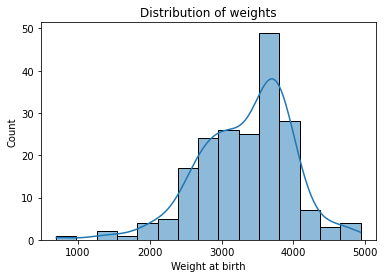

In [10]:
#creating a histplot
sns.histplot( data = bw,
              x    = "bwght",
              kde  = True)
# title and axis labels
plt.title(label   = "Distribution of weights")
plt.xlabel(xlabel = "Weight at birth") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

<div class="mark">
The data is slightly skewed to the left.</div><i class="fa fa-lightbulb-o "></i>


    2.6 Descriptive Statistics

In [11]:
#running descriptive statistics of the data
bw.describe().round(2)

,MoAge,MoEduc,MonPre,Nopvis,FaAge,FaEduc,omaps,fmaps,cigs,drink,male,Mowhte,Moblck,Mooth,Fawhte,Fablck,Faoth,bwght
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.61,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.04,1.36,4.23,8.98,2.59,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


# . Correlation Analysis between Variables
       3.1 Plotting the correlation graphs.

<AxesSubplot:>

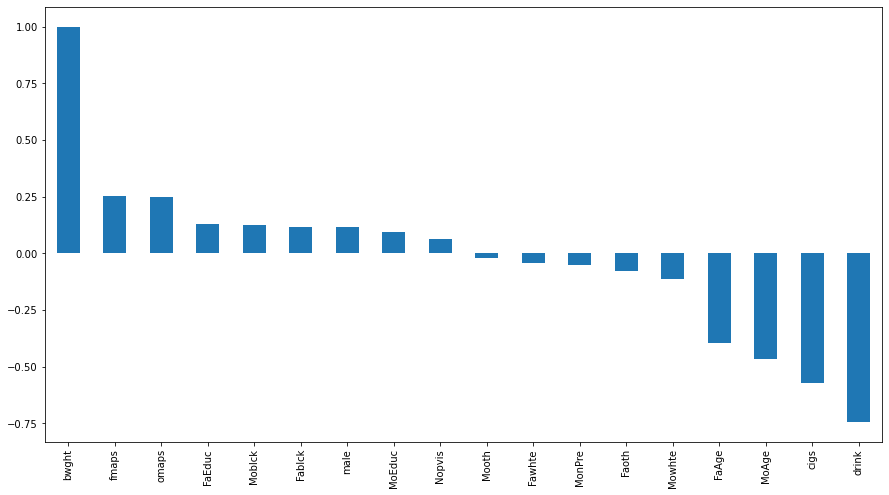

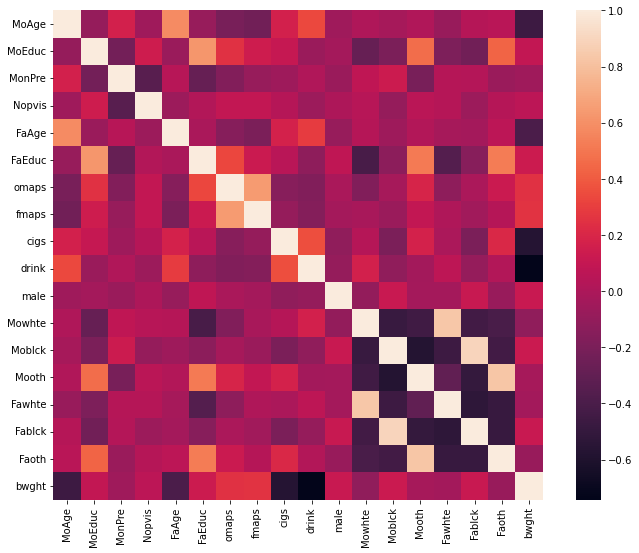

In [12]:
#Running correlation analysis between the variables to understand the significance of each x-variable over the y-variable

plt.figure(figsize=(15,8))
bw.corr()['bwght'].sort_values(ascending = False).plot(kind='bar')


#Plotting a heatmap
corrmat = bw.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True)




     3.2 Correlation with respect to 'bwght'.

In [13]:
#getting correlation values of variables w.r.t. only the dependent variable.
bw[bw.columns[1:]].corr()['bwght'][:]

MoEduc    0.094206
MonPre   -0.051827
Nopvis    0.062091
FaAge    -0.395985
FaEduc    0.131273
omaps     0.250153
fmaps     0.252024
cigs     -0.572385
drink    -0.743125
male      0.114855
Mowhte   -0.114388
Moblck    0.126145
Mooth    -0.022065
Fawhte   -0.040909
Fablck    0.117581
Faoth    -0.078401
bwght     1.000000
Name: bwght, dtype: float64

In [14]:
#Correlation Analysis
bw.corr(method ='pearson')

,MoAge,MoEduc,MonPre,Nopvis,FaAge,FaEduc,omaps,fmaps,cigs,drink,male,Mowhte,Moblck,Mooth,Fawhte,Fablck,Faoth,bwght
MoAge,1.000000,-0.094028,0.164198,-0.051656,0.583608,-0.086760,-0.211302,-0.238031,0.167293,0.336698,-0.049694,0.007738,-0.024107,0.017395,-0.082203,0.035503,0.048140,-0.463811
MoEduc,-0.094028,1.000000,-0.232228,0.137913,-0.069698,0.619529,0.249224,0.140437,0.103739,-0.071381,-0.033436,-0.284530,-0.193431,0.463016,-0.184906,-0.233591,0.429406,0.094206
MonPre,0.164198,-0.232228,1.000000,-0.342874,0.042767,-0.286874,-0.168007,-0.084856,-0.058436,0.015553,-0.075269,0.075486,0.134837,-0.208120,0.037708,0.032603,-0.072167,-0.051827
Nopvis,-0.051656,0.137913,-0.342874,1.000000,-0.062502,0.024629,0.091358,0.087839,0.037018,-0.067520,0.003469,0.040307,-0.093286,0.057642,0.034802,-0.067940,0.033823,0.062091
FaAge,0.583608,-0.069698,0.042767,-0.062502,1.000000,-0.013147,-0.157184,-0.196277,0.174795,0.291435,-0.085186,0.035367,-0.057187,0.025391,-0.027247,-0.032996,0.061815,-0.395985
FaEduc,-0.086760,0.619529,-0.286874,0.024629,-0.013147,1.000000,0.326497,0.127714,0.049043,-0.122493,0.075458,-0.414750,-0.125733,0.515404,-0.357027,-0.150448,0.521183,0.131273
omaps,-0.211302,0.249224,-0.168007,0.091358,-0.157184,0.326497,1.000000,0.640958,-0.149436,-0.175694,-0.012647,-0.177331,-0.023638,0.189610,-0.117133,-0.006771,0.127358,0.250153
fmaps,-0.238031,0.140437,-0.084856,0.087839,-0.196277,0.127714,0.640958,1.000000,-0.094834,-0.157919,-0.033829,-0.019572,-0.069815,0.089551,0.007070,-0.043160,0.036947,0.252024
cigs,0.167293,0.103739,-0.058436,0.037018,0.174795,0.049043,-0.149436,-0.094834,1.000000,0.355779,-0.115098,0.033570,-0.197749,0.170593,-0.007297,-0.193035,0.205261,-0.572385
drink,0.336698,-0.071381,0.015553,-0.067520,0.291435,-0.122493,-0.175694,-0.157919,0.355779,1.000000,-0.092433,0.164619,-0.111658,-0.039600,0.071382,-0.095792,0.024750,-0.743125


<BR><BR>
# . Feature engineering the Variables.
        4.1 Engineering the most co-related x-variables.

In [15]:
# Adding MoAge and FaAge together to see the cumulative impact of parents' age on the weight of the baby.
#Studies say that the greater the age of both the parents, greater is the probability that the child weighs low.
bw['age'] = bw['MoAge'] + bw['FaAge']

#Adding the Educational years of the parents to see if having higher levels of qualifications can impact the weight of the baby.
#Studies say that women with lower years of education (high school) tend to give birth to babies with lower weights.
bw['Edu'] = bw['MoEduc'] +bw['FaEduc']

#dropping the variables that do not have significance over the y- variable and also the columns that were engineered.
dropping_columns = [ 'omaps' , 'fmaps', 'MonPre', 'Nopvis', 'male', 'FaAge', 'MoAge','MoEduc', 'FaEduc', 'Mowhte','Moblck', 'Faoth','Mooth' ,'Fawhte', 'Fablck' ]
bw.drop(dropping_columns, axis = 1, inplace = True)

<BR><BR>
# . Splitting the data in test and train data
        5.1 Separating the features and target variable

In [16]:
# Separate input features (X) and target variable (y)
y = bw.bwght
x = bw.drop('bwght', axis=1)

    5.2 Splitting the data into test and train data sets

In [17]:

#splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=219)


In [18]:
#checking the training data shape
x_train.shape

(147, 4)

<BR><BR>
# . Creating models
       6.1 Ordinary Least squared regression

In [19]:
# importing an additional package
import statsmodels.api as smf # predictive modeling with nice outputs

#  Instantiating  model object
from statsmodels.api import add_constant

from statsmodels.api import add_constant

x_train = add_constant(x_train)
x_test = add_constant(x_test)

lm_best = smf.OLS(y_train, x_train).fit()

# analyzing the Summary 
print(lm_best.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     90.60
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           4.28e-38
Time:                        21:30:51   Log-Likelihood:                -1071.5
No. Observations:                 147   AIC:                             2153.
Df Residuals:                     142   BIC:                             2168.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4719.4717    250.565     18.835      0.0

/Users/sravyaduddupudi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
# Institaing the model object
lr = LinearRegression()


# FIitting it to the train data
lr_fit = lr.fit(x_train, y_train)


# Predicting data
lr_pred = lr_fit.predict(x_test)


# Score the results
print('OLS Training Score :', lr.score(x_train, y_train).round(4))
print('OLS Testing Score  :', lr.score(x_test, y_test).round(4))


# Saving & scoring data 
lr_train_score = lr.score(x_train, y_train).round(4) # using R-square
lr_test_score  = lr.score(x_test, y_test).round(4)   # using R-square


# Showing the gap between training and testing data
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7185
OLS Testing Score  : 0.6609
OLS Train-Test Gap : 0.0576



    6.2 LASSO REGRESSION

In [21]:
#importing necessary packages
import sklearn.linear_model
# Instatiating the model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 1.0,  
                                         normalize = True) 


# Fitting it to the train data
lasso_fit = lasso_model.fit(x_train, y_train)


# PRredict  data
lasso_pred = lasso_fit.predict(x_test)


# Score the results
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))


# scoring the data
lasso_train_score = lasso_model.score(x_train, y_train).round(4) 
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)   


# Showing the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7175
Lasso Testing Score  : 0.6708
Lasso Train-Test Gap : 0.0467


/Users/sravyaduddupudi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


    6.3 ADR Regression

In [22]:
# Instatiating the model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# Fitting it to the train data
ard_fit = ard_model.fit(x_train, y_train)


# Predict  data
ard_pred = ard_fit.predict(x_test)

#Score results
print('Training Score:', ard_model.score(x_train, y_train).round(4))
print('Testing Score :',  ard_model.score(x_test, y_test).round(4))


# saving & scoring data 
ard_train_score = ard_model.score(x_train, y_train).round(4)
ard_test_score  = ard_model.score(x_test, y_test).round(4)


# Showing the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.718
Testing Score : 0.6693
ARD Train-Test Gap : 0.0487


/Users/sravyaduddupudi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


    6.4 KNN

In [23]:
#IMPORTING THE NECESSARY PACKAGES
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)

# Train the model using the training sets
results = neigh.fit(x_train, y_train)

# Make predictions using the testing set
bw_y_pred = neigh.predict(x_test)

#Printing the score results
print('Training Score:', neigh.score(x_train, y_train).round(4))
print('Testing Score :',  neigh.score(x_test, y_test).round(4))


# saving & scoring data 
KNN_train_score = neigh.score(x_train, y_train).round(4)
KNN_test_score  = neigh.score(x_test, y_test).round(4)

# Showing the gap between training and testing
print('KNN Train-Test Gap :', abs(KNN_train_score - KNN_test_score).round(4))
KNN_test_gap = abs(KNN_train_score - KNN_test_score).round(4)

Training Score: 0.8434
Testing Score : 0.4014
KNN Train-Test Gap : 0.442


# . Comparison of Models
    

In [24]:
# comparing results of all the models

print(f"""
Model      Train Score     Test Score      Train-Test Gap
-----      -----------     ----------      --------------
OLS        {lr_train_score}           {lr_test_score}            {lr_test_gap}
Lasso      {lasso_train_score}           {lasso_test_score}            {lasso_test_gap}
ARD        {ard_train_score}            {ard_test_score}            {ard_test_gap}
KNN        {KNN_train_score}           {KNN_test_score}            {KNN_test_gap}
""") 


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD', 'KNN'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score, KNN_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score, KNN_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap, KNN_test_gap],
                    }





Model      Train Score     Test Score      Train-Test Gap
-----      -----------     ----------      --------------
OLS        0.7185           0.6609            0.0576
Lasso      0.7175           0.6708            0.0467
ARD        0.718            0.6693            0.0487
KNN        0.8434           0.4014            0.442



# . Conclusion
    We can see that the models, OLS, Lasso & ADR all have almost similar train and test scores. However, we can see that no matter how small, Lasso has the lowest 'Train-Test Gap', followed by ADR and then OLS. Also, Lasso has the highest test scores. Thus, my ideal model would be LASSO REGRESSION MODEL.